In [1]:
# Configure for Platform
import os
from pathlib import Path
import sys

if Path("/kaggle").exists():
    platform = "kaggle"
    sys.path.append("/kaggle/input/sicheng-ml-lib")
    OUTPUT_DIR = Path("/kaggle/working/")
else:
    platform = "local"
    os.environ["KERAS_BACKEND"] = "jax"
    OUTPUT_DIR = Path("../../output/")
print(f"the platform is {platform}")

the platform is local


In [2]:
# Initial Environment
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mylib import kaggle_datasets

handles = [
    "ryanholbrook/ts-course-data",
]

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4), titlesize=18, titleweight="bold")
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titlesize=16,
    titlepad=10,
)
# 下面的配置，使得图片以高分辨率模式输出
%config InlineBackend.figure_format = 'retina'

            Hardcover
Date                 
2000-04-01        139
2000-04-02        128
2000-04-03        172
2000-04-04        139
2000-04-05        191
            Hardcover  Time
Date                       
2000-04-01        139     0
2000-04-02        128     1
2000-04-03        172     2
2000-04-04        139     3
2000-04-05        191     4


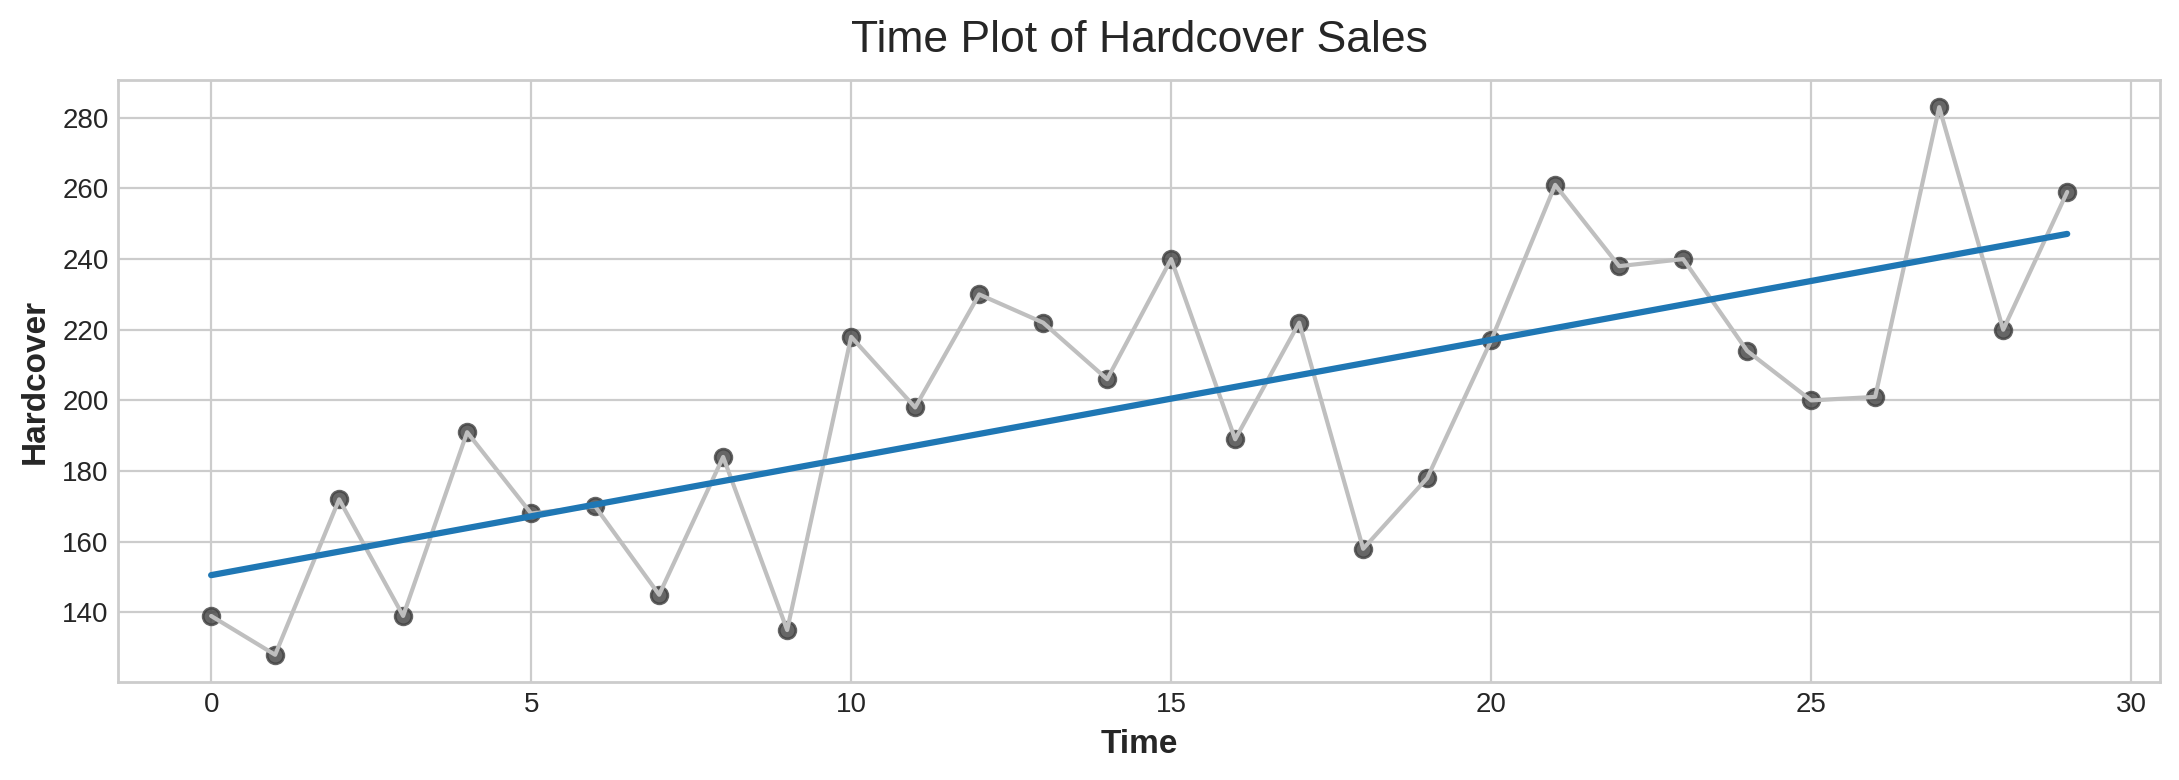

            Hardcover  Lag_1
Date                        
2000-04-01        139    NaN
2000-04-02        128  139.0
2000-04-03        172  128.0
2000-04-04        139  172.0
2000-04-05        191  139.0


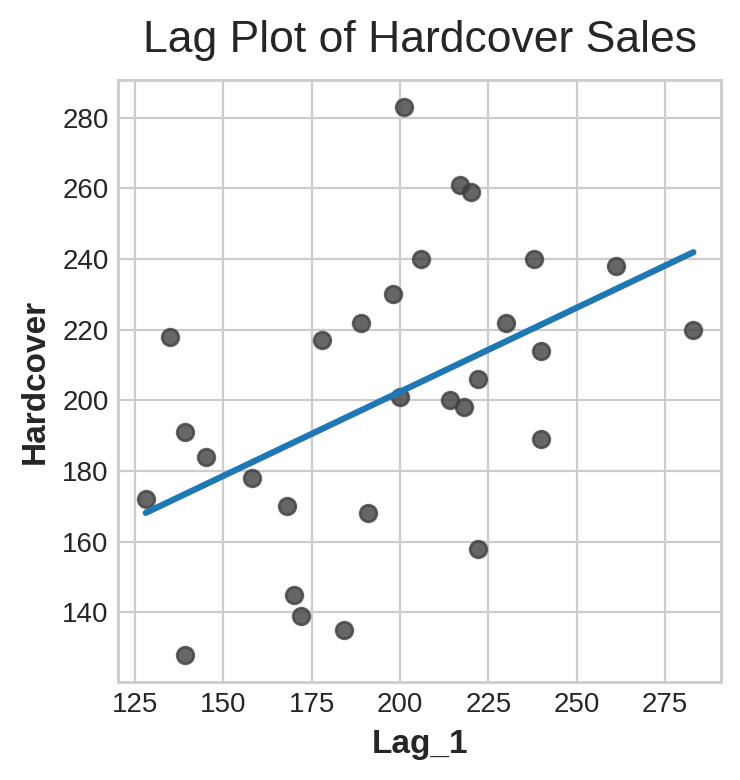

In [3]:
# 1. data =  book_scale.csv
# load data
df = pd.read_csv(
    kaggle_datasets(handles[0]) / "book_sales.csv",
    index_col="Date",
    parse_dates=["Date"],
).drop("Paperback", axis=1)
print(df.head())
df["Time"] = np.arange(len(df.index))
print(df.head())

# time plot
plt.plot("Time", "Hardcover", data=df, color="0.75")
sns.regplot(x="Time", y="Hardcover", data=df, ci=None, scatter_kws=dict(color="0.25"))
plt.title("Time Plot of Hardcover Sales")
plt.show()

# lag plot
df["Lag_1"] = df["Hardcover"].shift(1)
df = df.reindex(columns=["Hardcover", "Lag_1"])
print(df.head())

sns.regplot(x="Lag_1", y="Hardcover", data=df, ci=None, scatter_kws=dict(color="0.25"))
plt.gca().set_aspect("equal")
plt.title("Lag Plot of Hardcover Sales")
plt.show()

In [4]:
# 2. data = tunnel.csv
# load data
tunnel = pd.read_csv(kaggle_datasets(handles[0]) / "tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day")
tunnel = tunnel.to_period()
print(tunnel.head())
df = tunnel.copy()
df["Time"] = np.arange(len(tunnel.index))
print(df.head())

            NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569
            NumVehicles  Time
Day                          
2003-11-01       103536     0
2003-11-02        92051     1
2003-11-03       100795     2
2003-11-04       102352     3
2003-11-05       106569     4


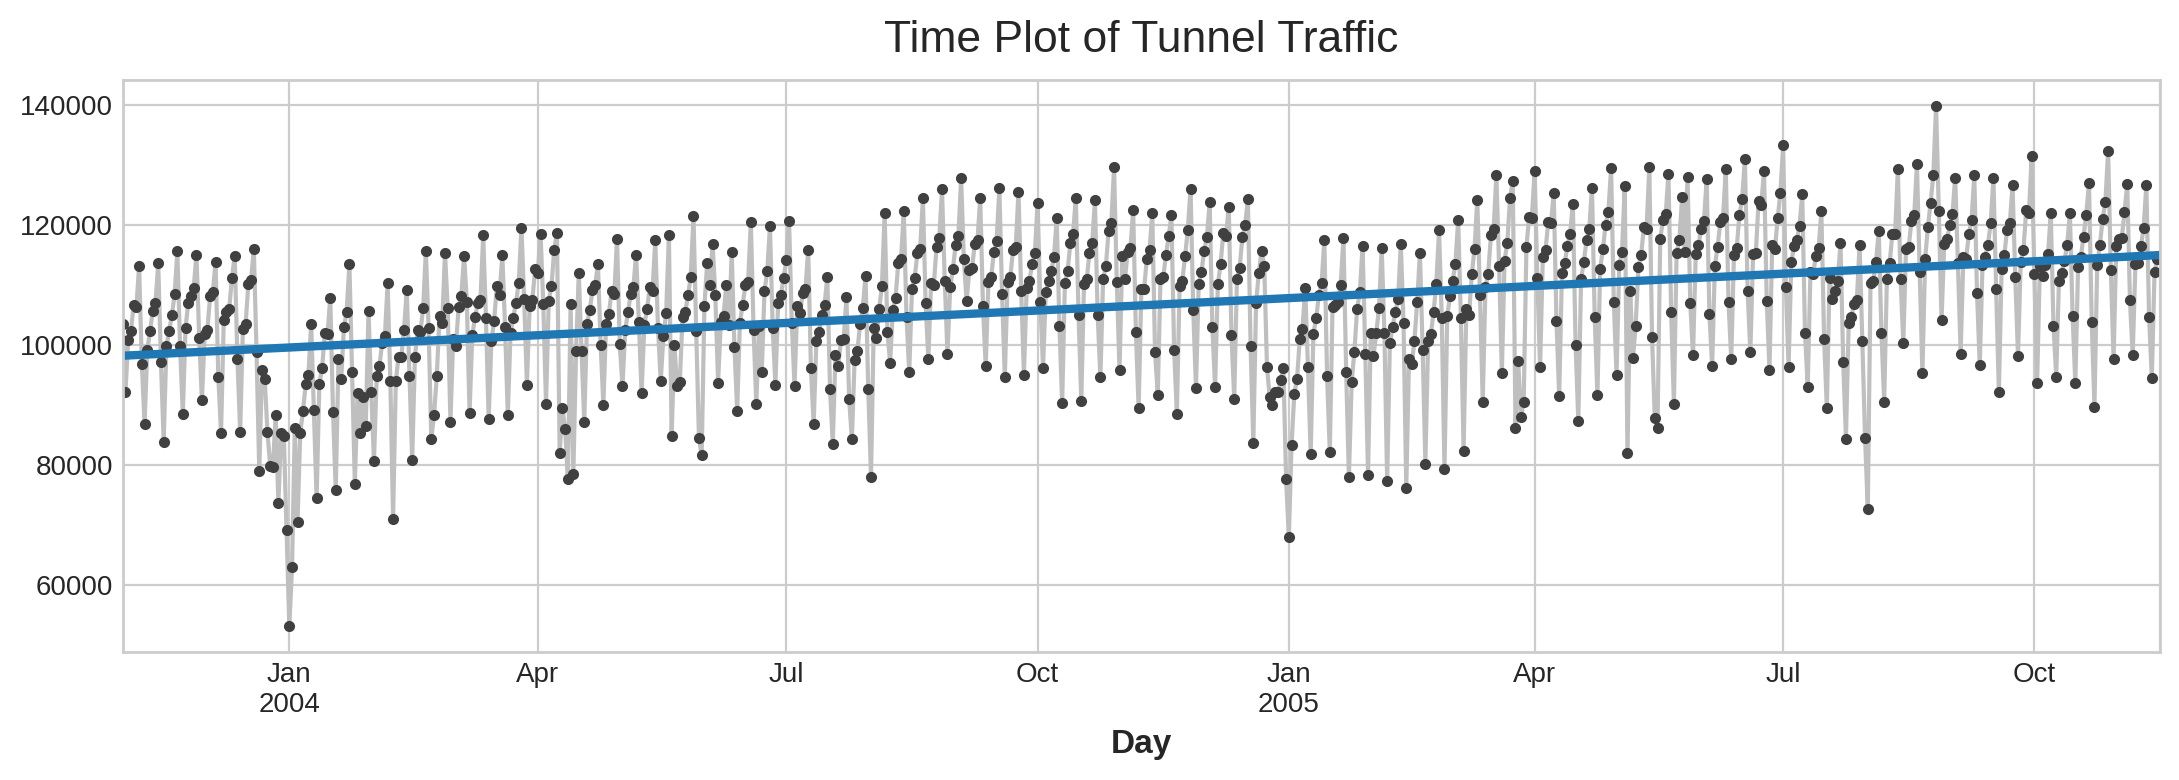

In [5]:
# train linear regression model
from sklearn.linear_model import LinearRegression

X = df.loc[:, ["Time"]]
y = df.loc[:, "NumVehicles"]

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

# time plot
plot_params = dict(
    color="0.75",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    style=".-",
    legend=False,
)

ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title("Time Plot of Tunnel Traffic")
plt.show()

            NumVehicles  Time     Lag_1
Day                                    
2003-11-01       103536     0       NaN
2003-11-02        92051     1  103536.0
2003-11-03       100795     2   92051.0
2003-11-04       102352     3  100795.0
2003-11-05       106569     4  102352.0
X:
                Lag_1
Day                 
2003-11-02  103536.0
2003-11-03   92051.0
2003-11-04  100795.0
2003-11-05  102352.0
2003-11-06  106569.0
y:
 Day
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
2003-11-06    106284
Freq: D, Name: NumVehicles, dtype: int64


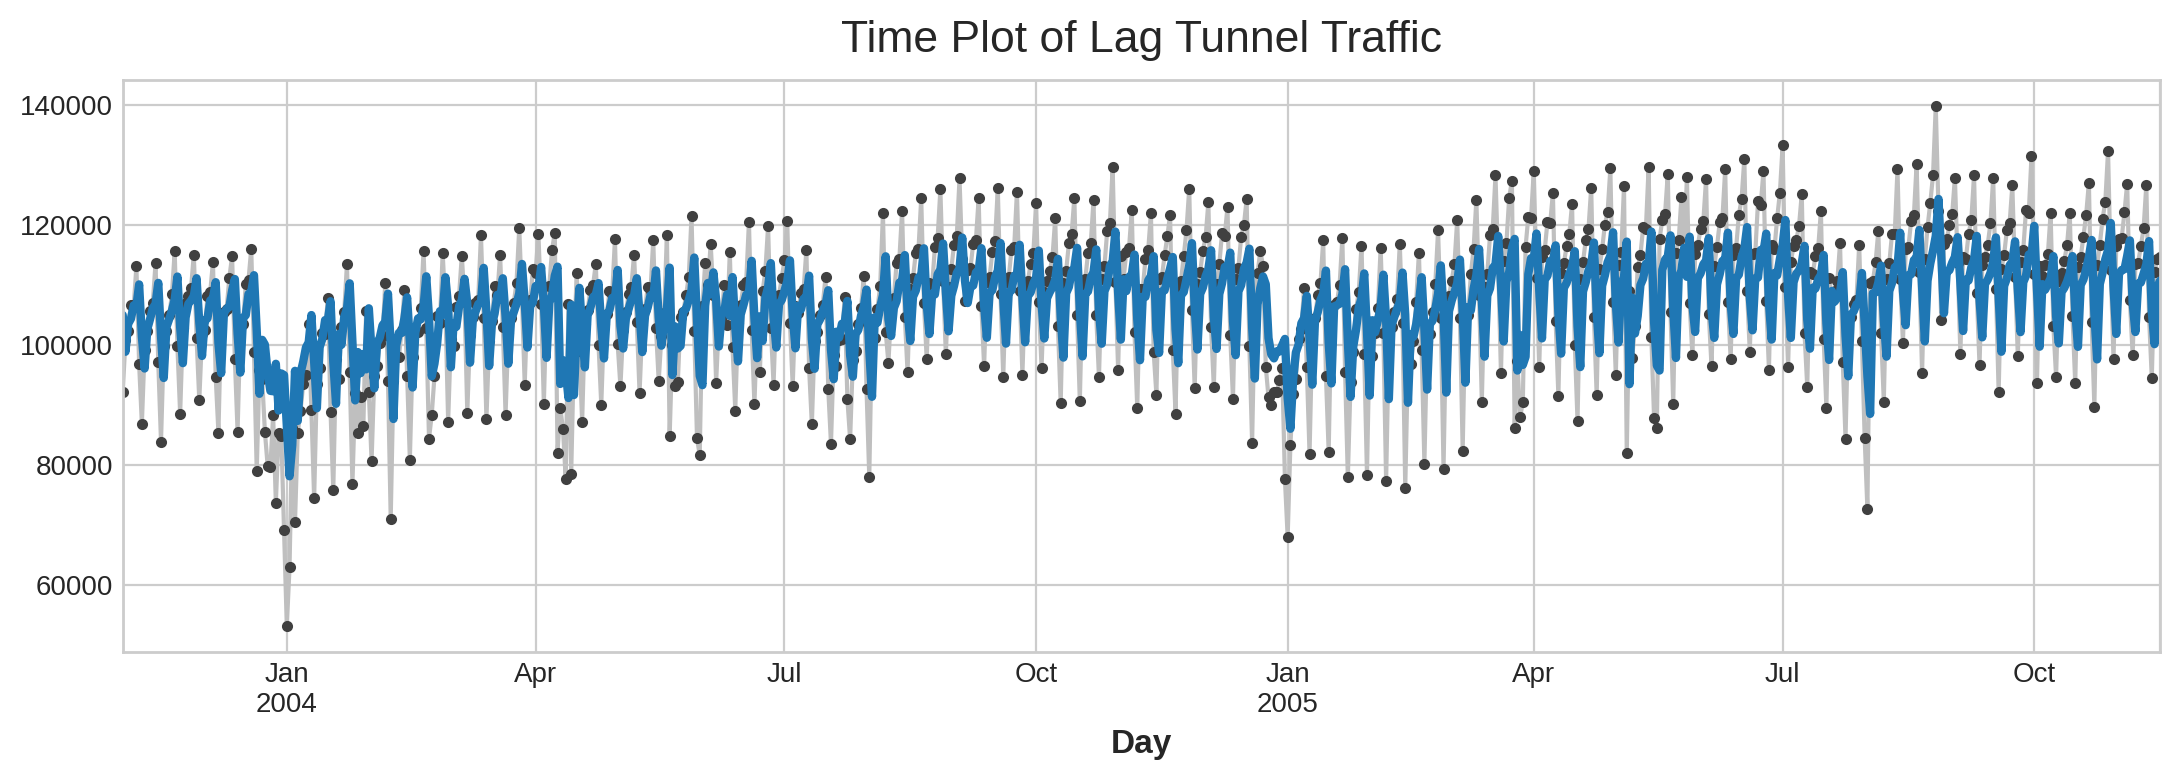

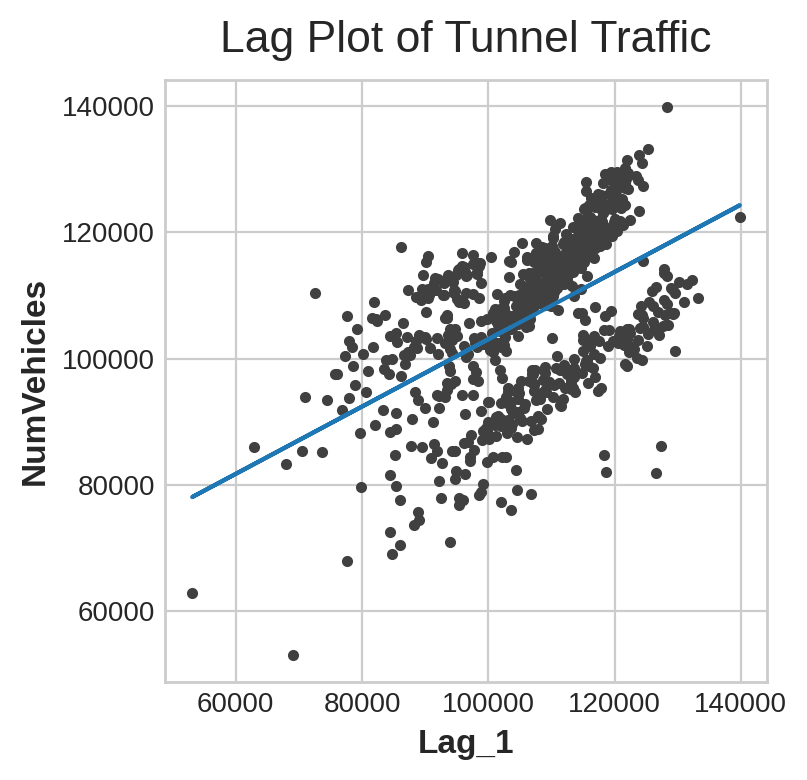

In [6]:
# lag linear model
df["Lag_1"] = df["NumVehicles"].shift(1)
print(df.head())

X = df.loc[:, ["Lag_1"]]
X.dropna(inplace=True)
y = df.loc[:, "NumVehicles"]
y, X = y.align(X, join="inner")
print("X:\n", X.head())
print("y:\n", y.head())

model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

# time plot
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title("Time Plot of Lag Tunnel Traffic")
plt.show()

# Lag plot
plt.plot(X["Lag_1"], y, ".", color="0.25")
plt.plot(X["Lag_1"], y_pred)
plt.gca().set_aspect("equal")
plt.ylabel("NumVehicles")
plt.xlabel("Lag_1")
plt.title("Lag Plot of Tunnel Traffic")
plt.show()